# A novel disease mechanism leading to the expression of a disallowed gene in the pancreatic beta-cell identified by non-coding, regulatory variants controlling HK1
## https://doi.org/10.1101/2021.12.03.21267240
## Notebook to generate all genomics figure panels


Note repository contains source data for all gene expression and quantifications of ChIP-seq and ATAC-seq data at particular locu. Repository does not contain alignment files, but code is supplied to regenerate quantifications if suitable alignment files are present.

In [1]:
include(joinpath("..", "src", "HK1FigureNotebook.jl"));

In [2]:
mutations, region, distinctmutations, refseq, altseqs, hk1coords, genecoords, datasets, datagroup, FM, hicdata, gtex, betadiffstage, betadiffsc, islet_scrnaseq, betadifflate, isletcooler = loaddata(false, false);


# Motif Analysis

In [3]:
motifmeta, motifs = loadtransfac();
motscan = motifscannall(refseq, altseqs, distinctmutations, motifs)
motscan.MotifFamily = motiffamily.(motscan.MotifName);


motmatch_tier1 = filtermatches(motscan, minscore=0.6) 
motmatch_tier2 = filtermatches(motscan, minscore=0.45, maxscore=0.6);

motsel_tier1 = motif_rank1(motmatch_tier1) ## table of rank 1 matches for plotting
motsel_tier2 = motif_rank1(motmatch_tier2) ## table of rank 1 matches for plotting

motifmatches = motifmatchtable(motmatch_tier1, motmatch_tier2, region); ## final table

# Figure 3

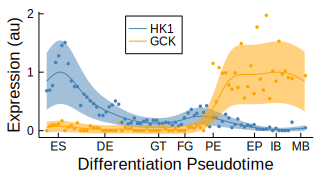

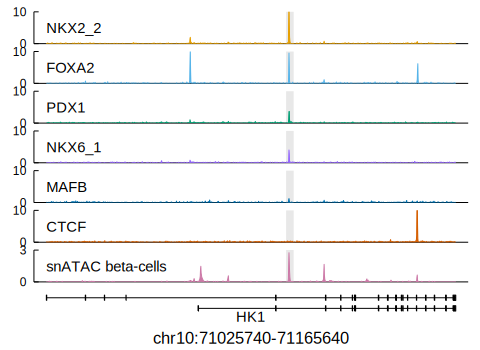

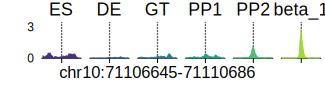

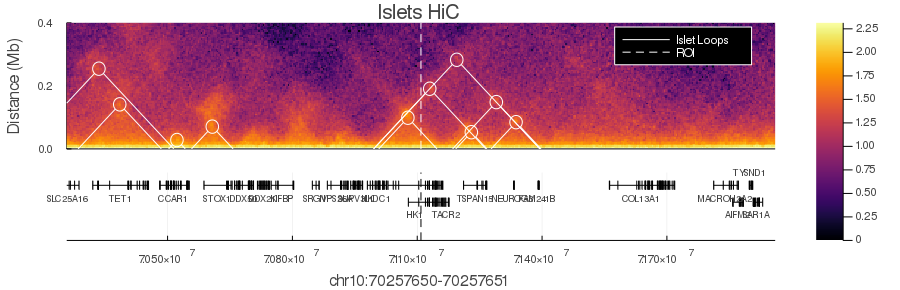

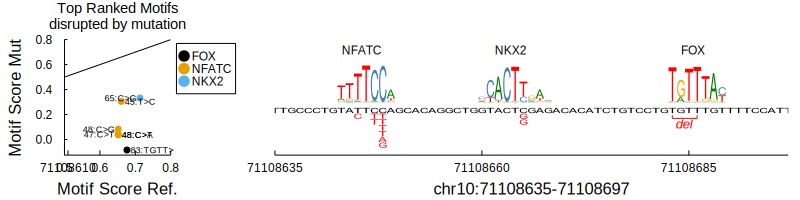

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [4]:
fig_3a = gp_hk1_gck(betadiffsc)
fig_3b = calcisletpanel("genelocus", datagroup, hk1coords, FM, genecoords)
fig_3c = calcatacdiff_subpanel("criticalregion_4k", datagroup, hk1coords, FM, genecoords);
fig_3d = coolerpanel(hk1coords["widecontactview"]..., isletcooler, hicdata, hk1coords)

fig_3e_left = disruptmotifscatter(@subset(motmatch_tier1, :ID .!= "71108660_G_A", :Rank .== 1))
fig_3e_right = disruptedmotif_seqlogo(region, @subset(mutations, :start .!= 71108660), @subset(motsel_tier1, :ID .!= "71108660_G_A"))
fig_3e = plot(fig_3e_left, fig_3e_right, layout=@layout([a b{0.75w}]), size=(800, 200), left_margin=5mm, top_margin=5mm)

display(fig_3a)
display(fig_3b)
display(fig_3c)
display(fig_3d)
display(fig_3e)

# Supplementary Figure 3

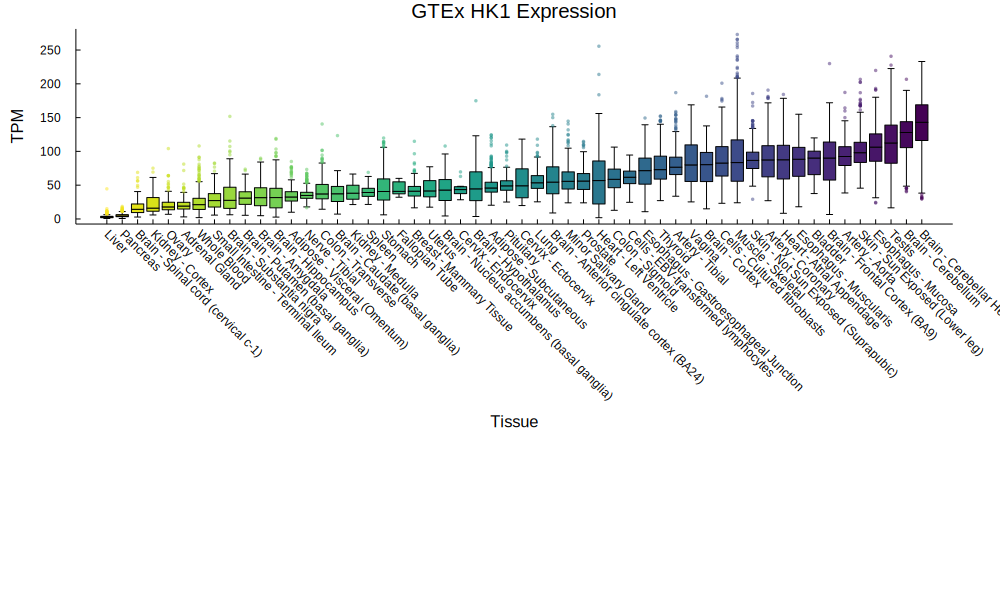

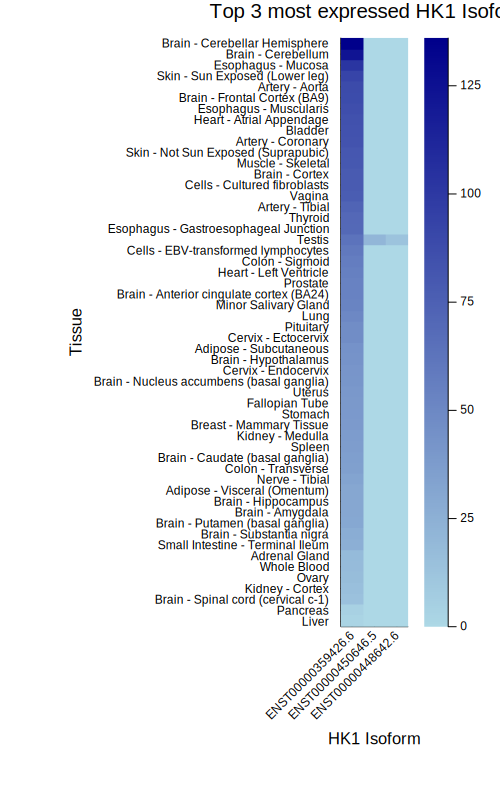

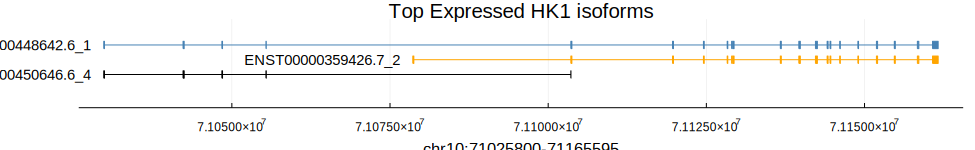

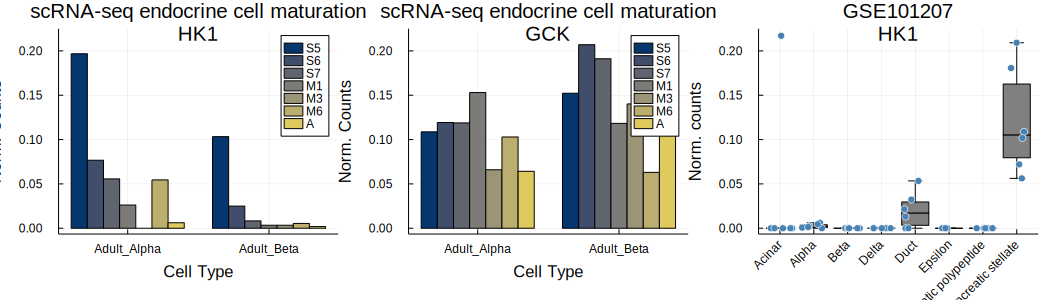

In [5]:
fig_s3_a = gtexboxplot(gtex.genetpm, rev=true, orderfield=:MedianOrder)
fig_s3_b = gtexisoformheatmap(gtex.tpm, num_iso=3, c=cgrad(:blues, rev=false))
fig_s3_c = plot_hk1_isoforms(gtex.tpm, genecoords; num_iso=3)


fig_s3_d_l = barbetadiff("HK1", betadifflate)
fig_s3_d_r = barbetadiff("GCK", betadifflate)
fig_s3_e   = scboxplot("HK1", islet_scrnaseq)

fig_s3_de = plot(fig_s3_d_l, fig_s3_d_r, fig_s3_e, layout=(1, 3), size=(1050, 300), fontfamily="helvetica", ylims=(-0.0065, 0.225))


display(fig_s3_a)
display(fig_s3_b)
display(fig_s3_c)
display(fig_s3_de)

# Supplemental Figure 5

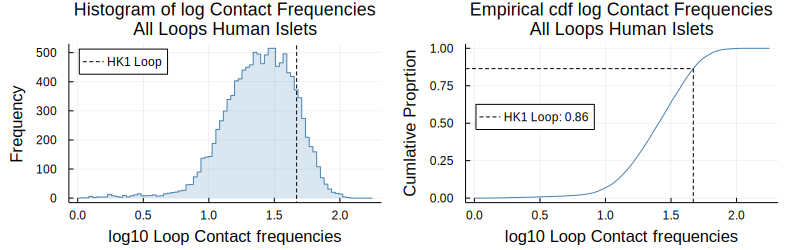

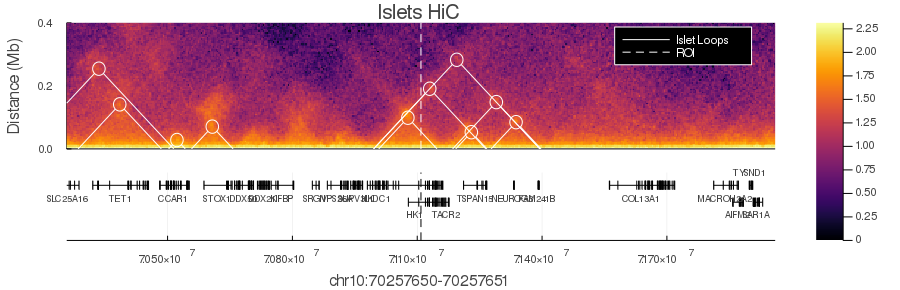

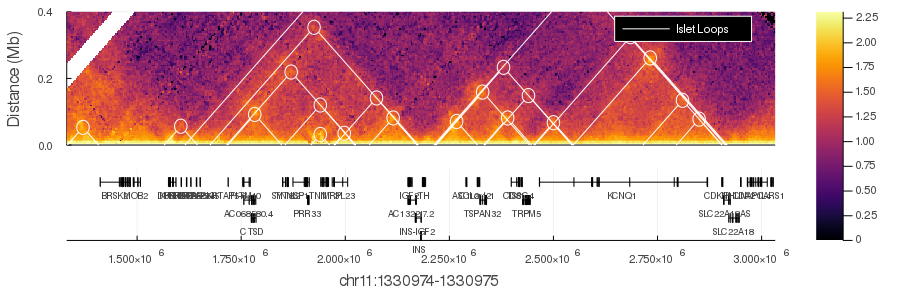

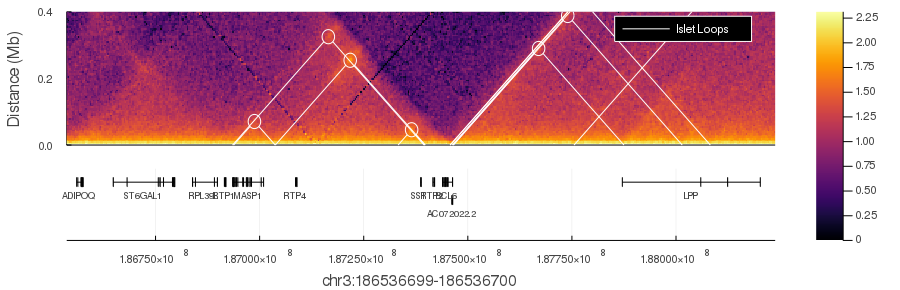

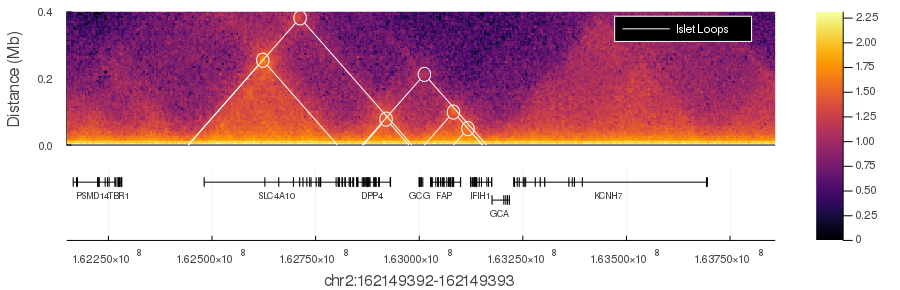

GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [6]:
fig_s5_a = hk1_loop_summary(hicdata, hk1coords)
fig_s5_b = coolerpanel(hk1coords["widecontactview"]..., isletcooler, hicdata, hk1coords);
fig_s5_c = coolerpanel(hk1coords["ins_contactview"]..., isletcooler, hicdata, hk1coords, plotroi=false);
fig_s5_d = coolerpanel(hk1coords["sst_contactview"]..., isletcooler, hicdata, hk1coords, plotroi=false);
fig_s5_e = coolerpanel(hk1coords["gcg_contactview"]..., isletcooler, hicdata, hk1coords, plotroi=false);
display(fig_s5_a)
display(fig_s5_b)
display(fig_s5_c)
display(fig_s5_d)
display(fig_s5_e)

# Supplemental Figure 6

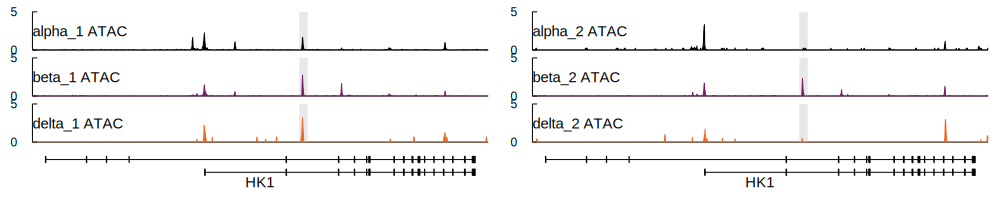

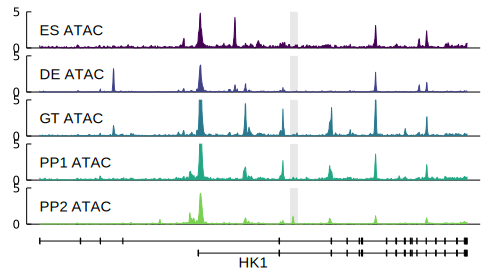

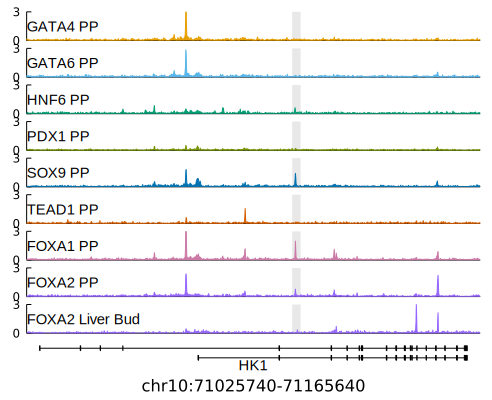

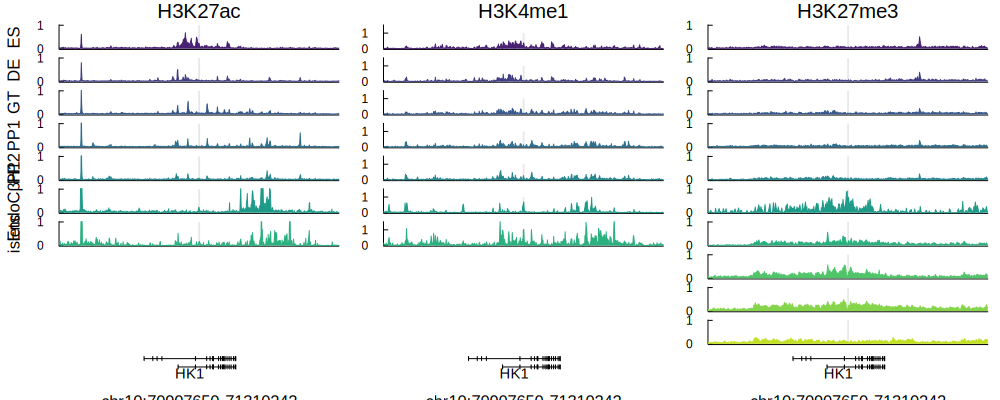

In [7]:
fig_s6_a = calc_snatachpanel("genelocus", datagroup, hk1coords, FM, genecoords)
fig_s6_b = calc_atacdiff_supp("genelocus", datagroup, hk1coords, FM, genecoords)
fig_s6_c = calc_progentior_panel("genelocus", datagroup, hk1coords, FM, genecoords)
fig_s6_d = calc_histonepanel("roi_200k", datagroup, hk1coords, FM, genecoords)
display(fig_s6_a)
display(fig_s6_b)
display(fig_s6_c)
display(fig_s6_d)

# Supplemental Figure 7

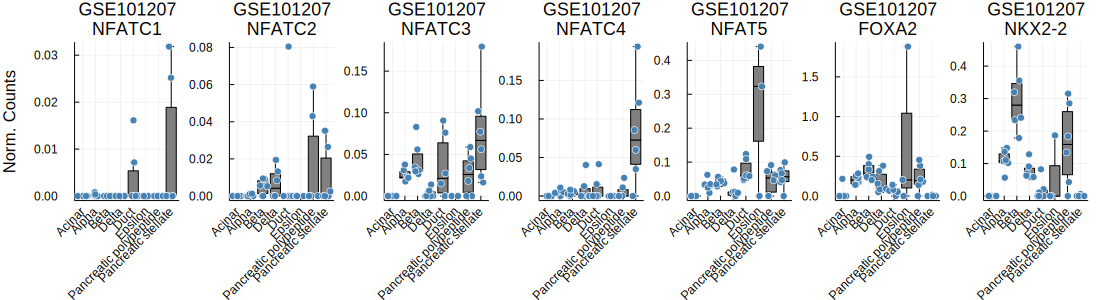

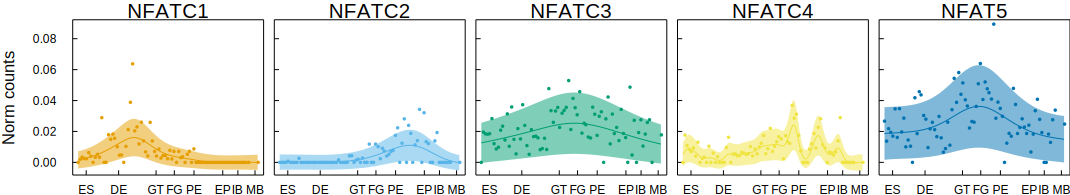

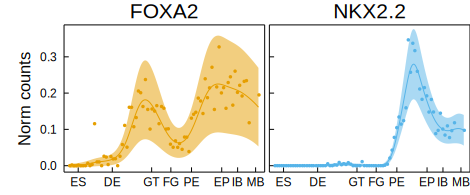

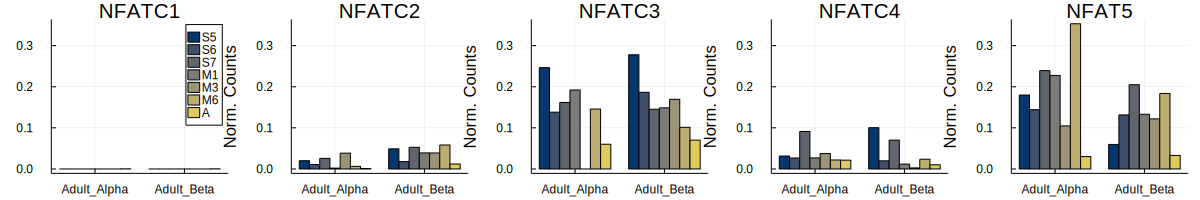

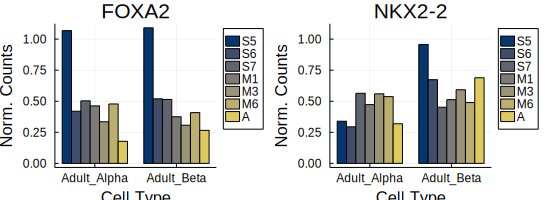

In [8]:
motifgenes = @subset(islet_scrnaseq.normcounts, occursin.(r"NFAT|NKX2-2|FOXA2", :Gene), :Gene .∉ Ref(["NFATC2IP"])).Gene
sort!(motifgenes, by= x -> ifelse(occursin("NFAT", x), (1, last(x)), (2, x)))

fig_s7_a = scboxplotgenes(motifgenes, islet_scrnaseq)

motifgenesgp = @subset(betadiffsc.data, occursin.(r"NFAT[C]*[0-9]$|NKX2.2|FOXA2", :Gene)).Gene
sort!(motifgenesgp, by= x -> ifelse(occursin("NFAT", x), (1, last(x)), (2, x)))
fig_s7_b_top    = plotgprgenes(filter(g ->  occursin("NFAT", g), motifgenesgp), betadiffsc)
fig_s7_b_bottom = plotgprgenes(filter(g -> !occursin("NFAT", g), motifgenesgp), betadiffsc)


phs_top    = [barbetadiff(g, betadifflate, title=g) for g in filter(g ->  occursin("NFAT", g), motifgenes)]
phs_bottom = [barbetadiff(g, betadifflate, title=g) for g in filter(g -> !occursin("NFAT", g), motifgenes)]
plot!.(phs_top[2:end], leg=false)
fig_s7_c_top    = plot(phs_top..., layout=(1, length(phs_top)), size=(1200, 200), link=:y)
fig_s7_c_bottom = plot(phs_bottom..., layout=(1, length(phs_bottom)), size=(550, 200), link=:y, leg=:outertopright)

display(fig_s7_a)
display(fig_s7_b_top)
display(fig_s7_b_bottom)
display(fig_s7_c_top)
display(fig_s7_c_bottom)

# Supplemental Figure 8

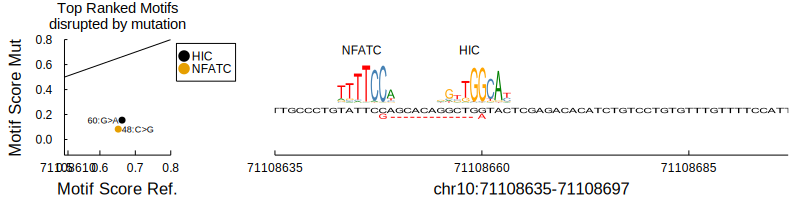

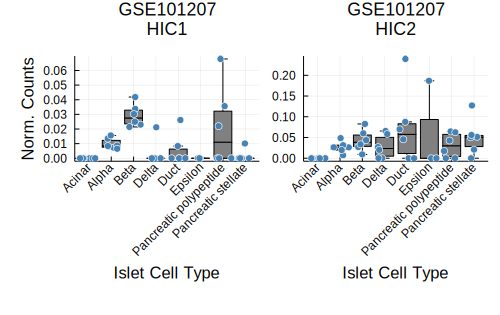

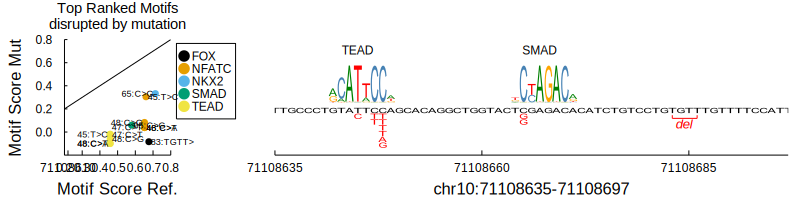

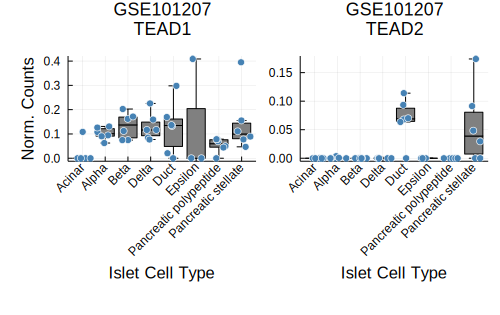

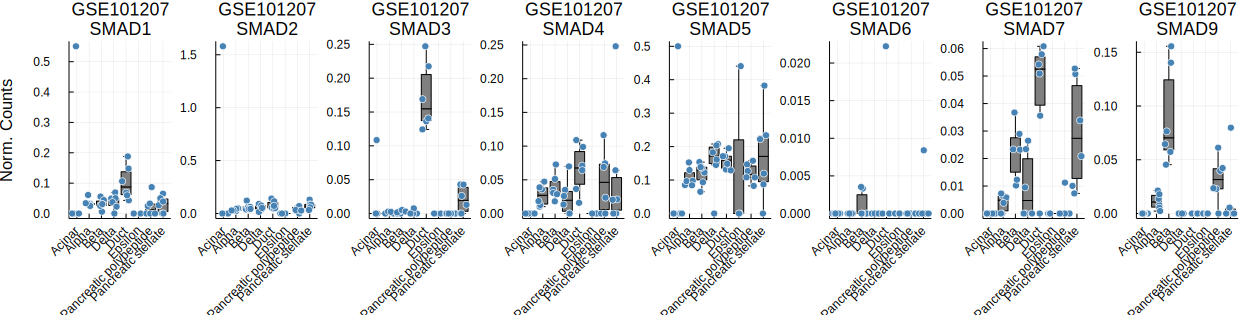

In [9]:
pat11_mots = @subset(innerjoin(motmatch_tier1, mutations[!, [:ID, :PatientGroup]], on=:ID), :PatientGroup .== 11, :Rank .== 1)
fig_s8a_left = disruptmotifscatter(pat11_mots)
fig_s8a_right = disruptedmotif_seqlogo(region, @subset(mutations, :PatientGroup .== 11), pat11_mots)
plot!(first.(@subset(mutations, :PatientGroup .== 11).RelReg) .+ [1, -1], [1, 1].*-0.2, c=:red, ls=:dash, lab="")
fig_s8a = plot(fig_s8a_left, fig_s8a_right, layout=@layout([a b{0.75w}]), size=(800, 200), left_margin=5mm, top_margin=5mm)
fig_s8b = scboxplotgenes(filter(g -> occursin(Regex(string("^", first(@subset(pat11_mots, :ID .== "71108660_G_A").MotifFamily))), g), islet_scrnaseq.normcounts.Gene), islet_scrnaseq, size=(500, 315))

matchtier2 = @subset(motmatch_tier2, :MotifFamily .∉ Ref(Set(motsel_tier1.MotifFamily)), :Rank .== 1)
motsel2 = @subset(motsel_tier2, :MotifFamily .∉ Ref(Set(motsel_tier1.MotifFamily)))

fig_s8c_left  = disruptmotifscatter([@subset(motmatch_tier1, :ID .!= "71108660_G_A", :Rank .== 1) ; matchtier2], xlims=(0.2, 0.8), ylims=(-.2, 0.8))
fig_s8c_right = disruptedmotif_seqlogo(region, @subset(mutations, :start .!= 71108660), motsel2)
fig_s8c = plot(fig_s8c_left, fig_s8c_right, layout=@layout([a b{0.75w}]), size=(800, 200), left_margin=5mm, top_margin=5mm)

fig_s8d = scboxplotgenes(filter(g -> occursin(motsel2.MotifFamily[1], g), islet_scrnaseq.normcounts.Gene)[1:2], islet_scrnaseq, size=(500, 315))
fig_s8e = scboxplotgenes(filter(g -> occursin(Regex(string("^", motsel2.MotifFamily[2], "[0-9]\$")), g), islet_scrnaseq.normcounts.Gene), islet_scrnaseq, size=(1250, 315))


display(fig_s8a)
display(fig_s8b)
display(fig_s8c)
display(fig_s8d)
display(fig_s8e)